In [2]:
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = '1a9ea75b5f92dfda381d817fc00e5458' 
USER_AGENT = '808e0a8bbaf9d30bf181edb60c742824'  
LIMIT = 20  ##Número de resultados a obtener

headers = {
    'user-agent': USER_AGENT
}

##sacar top artists
def get_top_artists():
    params = {
        'method': 'chart.getTopArtists',
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['artists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas globales: {response.status_code}")
    time.sleep(1)
    return df

##sacar top artistas por pais
def get_top_artists_by_country(country):
    params = {
        'method': 'geo.getTopArtists',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['topartists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas por país: {response.status_code}")
    time.sleep(1)
    return df

##sacar top canciones por pais
def get_top_tracks_by_country(country):
    params = {
        'method': 'geo.getTopTracks',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['tracks']['track'])
    else:
        print(f"Error en la solicitud de top canciones por país: {response.status_code}")
    time.sleep(1)
    return df


##sacar top album de x artista
def get_top_tracks_by_artist(artist):
    
    params = {
        'method': 'artist.getTopTracks',
        'artist': artist,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['toptracks']['track'])
    else:
        print(f"Error en la solicitud de top álbumes del artista: {response.status_code}")
    time.sleep(1)
    return df
    
##limpia y ordena dataframe
def limpiar_y_ordenar(df, columnas_a_eliminar=None):
    if columnas_a_eliminar:
        df = df.drop(columns=columnas_a_eliminar)
    if 'listeners' in df.columns:
        df = df.sort_values(by='listeners', ascending=False)
    df = df.reset_index(drop=True)
    return df

In [3]:
df_lana = get_top_tracks_by_artist("Lana del Rey")
df_ic3peak = get_top_tracks_by_artist("Ic3peak")
df_billie = get_top_tracks_by_artist("Billie Eilish")
df_sia = get_top_tracks_by_artist("Sia")
df_estopa = get_top_tracks_by_artist("Estopa")
df_badbunny = get_top_tracks_by_artist("Bad Bunny")

In [30]:
df_lana_filtered = limpiar_y_ordenar(df_lana,["url","streamable","image","artist.url", "@attr.rank","mbid","artist.mbid"])
df_ic3peak_filtered = limpiar_y_ordenar(df_ic3peak,["url","streamable","image","artist.url", "@attr.rank","artist.mbid"])
df_billie_filtered = limpiar_y_ordenar(df_billie,["url","streamable","image","artist.url", "@attr.rank"])
df_sia_filtered = limpiar_y_ordenar(df_sia,["url","streamable","image","artist.url", "@attr.rank","mbid","artist.mbid"])
df_estopa_filtered = limpiar_y_ordenar(df_estopa,["url","streamable","image","artist.url", "@attr.rank","mbid","artist.mbid"])
df_badbunny_filtered = limpiar_y_ordenar(df_badbunny,["url","streamable","image","artist.url", "@attr.rank"])


In [32]:
df_lana_filtered[["playcount", "listeners"]] = df_lana_filtered[["playcount", "listeners"]].astype(float)
df_ic3peak_filtered[["playcount", "listeners"]] = df_ic3peak_filtered[["playcount", "listeners"]].astype(float)
df_billie_filtered[["playcount", "listeners"]] = df_billie_filtered[["playcount", "listeners"]].astype(float)
df_sia_filtered[["playcount", "listeners"]] = df_sia_filtered[["playcount", "listeners"]].astype(float)
df_estopa_filtered[["playcount", "listeners"]] = df_estopa_filtered[["playcount", "listeners"]].astype(float)
df_badbunny_filtered[["playcount", "listeners"]] = df_badbunny_filtered[["playcount", "listeners"]].astype(float)


In [40]:
df_concatenated = pd.concat([df_lana_filtered, df_ic3peak_filtered, df_billie_filtered, df_sia_filtered, df_estopa_filtered, df_badbunny_filtered], ignore_index=True)
df_top_canciones = df_concatenated.sort_values(by="listeners", ascending=False).reset_index(drop=True)

In [41]:
reproducciones_por_artista = df_top_canciones.groupby('artist.name')['playcount'].sum().sort_values(ascending=False)

oyentes_por_artista = df_top_canciones.groupby('artist.name')['listeners'].sum().sort_values(ascending=False)

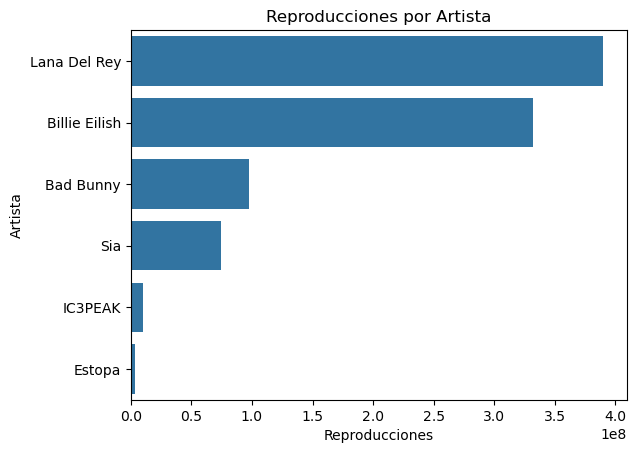

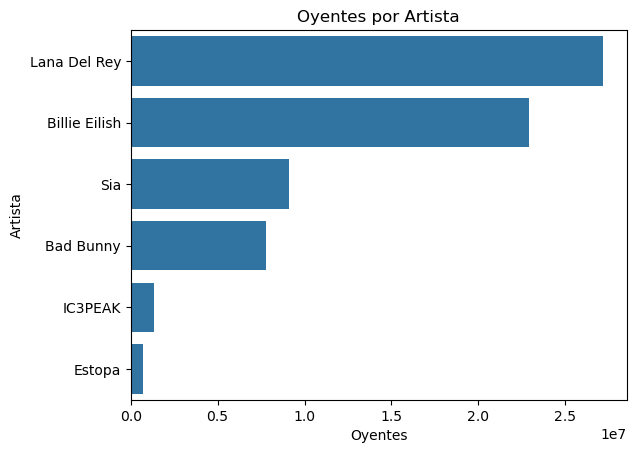

In [42]:
##Gráfico de barras para reproducciones
sns.barplot(x=reproducciones_por_artista.values, y=reproducciones_por_artista.index)
plt.title('Reproducciones por Artista')
plt.xlabel('Reproducciones')
plt.ylabel('Artista')
plt.show()

##Gráfico de barras para oyentes
sns.barplot(x=oyentes_por_artista.values, y=oyentes_por_artista.index)
plt.title('Oyentes por Artista')
plt.xlabel('Oyentes')
plt.ylabel('Artista')
plt.show()

In [44]:
top_canciones

,name,playcount,listeners,artist.name
2,BIRDS OF A FEATHER,40995136.0,1748006.0,Billie Eilish
0,Summertime Sadness,28440655.0,2102704.0,Lana Del Rey
6,West Coast,26044088.0,1518389.0,Lana Del Rey
1,Video Games,25811526.0,1963127.0,Lana Del Rey
3,Born to Die,25746590.0,1742147.0,Lana Del Rey
23,Wildflower,23905604.0,1197174.0,Billie Eilish
16,Happier Than Ever,23523946.0,1267216.0,Billie Eilish
21,CHIHIRO,22586946.0,1201807.0,Billie Eilish
22,Cinnamon Girl,21667738.0,1200617.0,Lana Del Rey
10,Brooklyn Baby,21455967.0,1399334.0,Lana Del Rey


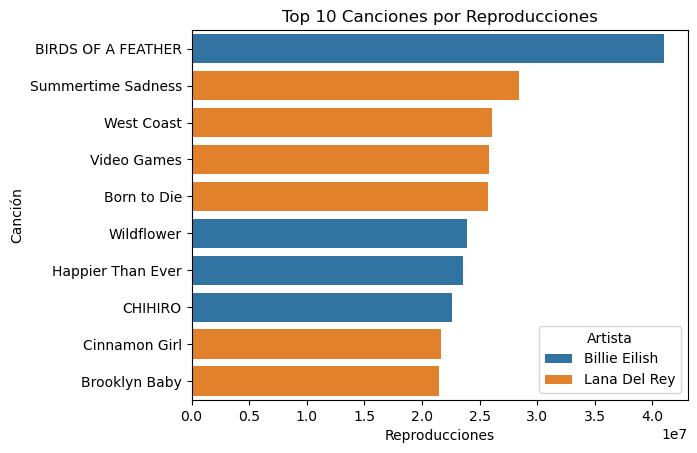

In [45]:
top_canciones = df_top_canciones.sort_values(by='playcount', ascending=False).head(10)

sns.barplot(x='playcount', y='name', data=top_canciones, hue='artist.name')
plt.title('Top 10 Canciones por Reproducciones')
plt.xlabel('Reproducciones')
plt.ylabel('Canción')
plt.legend(title='Artista')
plt.show()


In [56]:
import scipy
from scipy import stats
##correlacion de pearson
listeners= df_top_canciones["listeners"]
playcount= df_top_canciones["playcount"]
stats.pearsonr(listeners, playcount)[0]

0.9574934756771729

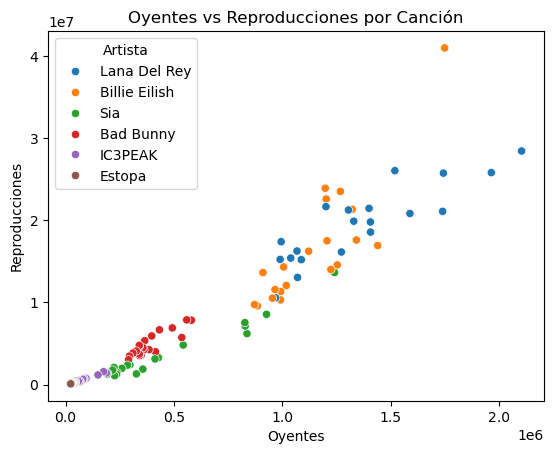

In [47]:
##relacion oyentes y reproducciones
sns.scatterplot(data=df_top_canciones, x='listeners', y='playcount', hue='artist.name')
plt.title('Oyentes vs Reproducciones por Canción')
plt.xlabel('Oyentes')
plt.ylabel('Reproducciones')
plt.legend(title='Artista')
plt.show()

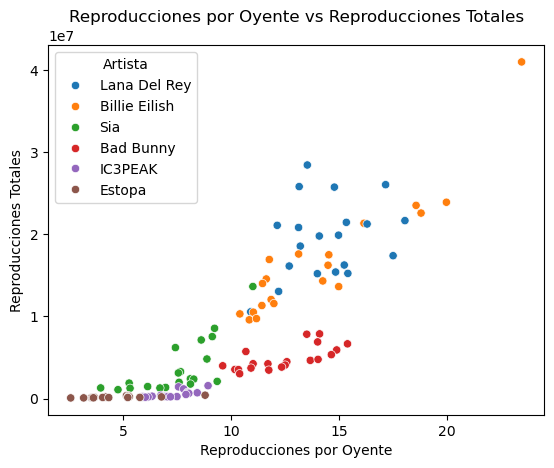

In [49]:
df_top_canciones['Reproducciones_por_Oyente'] = df_top_canciones['playcount'] / df_top_canciones['listeners']

sns.scatterplot(data=df_top_canciones, x='Reproducciones_por_Oyente', y='playcount', hue='artist.name')
plt.title('Reproducciones por Oyente vs Reproducciones Totales')
plt.xlabel('Reproducciones por Oyente')
plt.ylabel('Reproducciones Totales')
plt.legend(title='Artista')
plt.show()

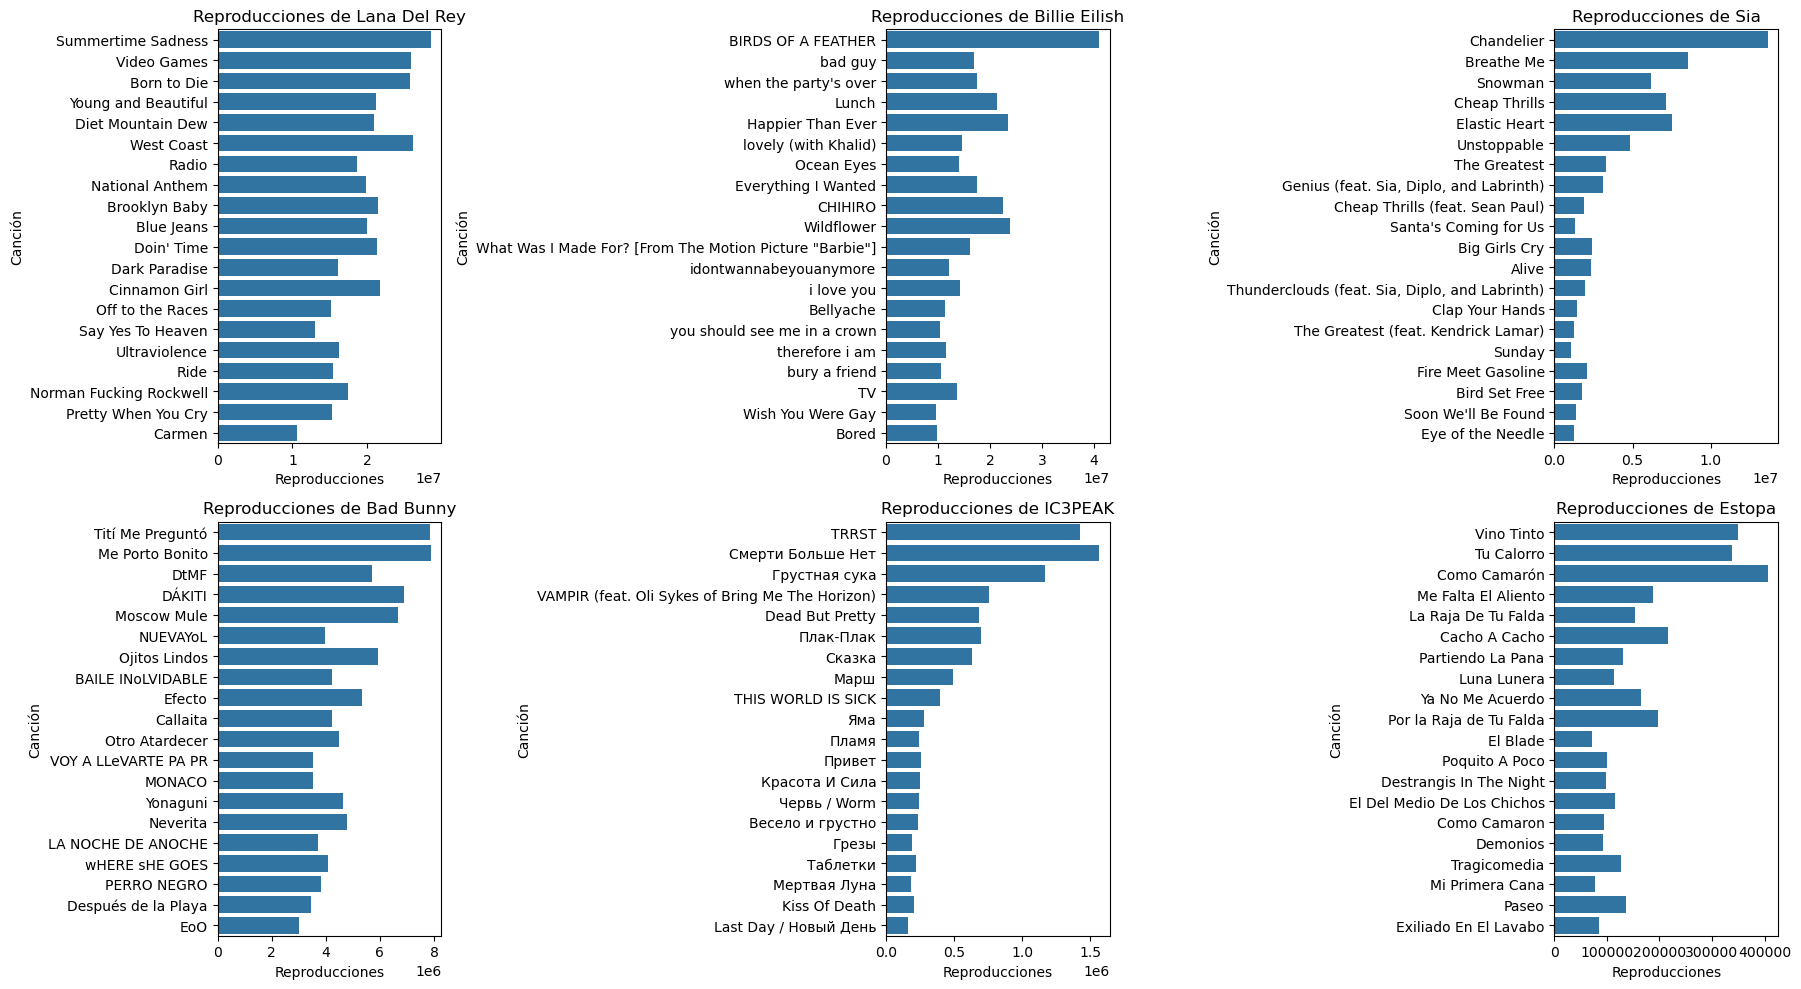

In [50]:
artistas = df_top_canciones['artist.name'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, artista in enumerate(artistas):
    datos_artista = df_top_canciones[df_top_canciones['artist.name'] == artista]
    sns.barplot(x='playcount', y='name', data=datos_artista, ax=axes[i])
    axes[i].set_title(f'Reproducciones de {artista}')
    axes[i].set_xlabel('Reproducciones')
    axes[i].set_ylabel('Canción')

plt.tight_layout()
plt.show()

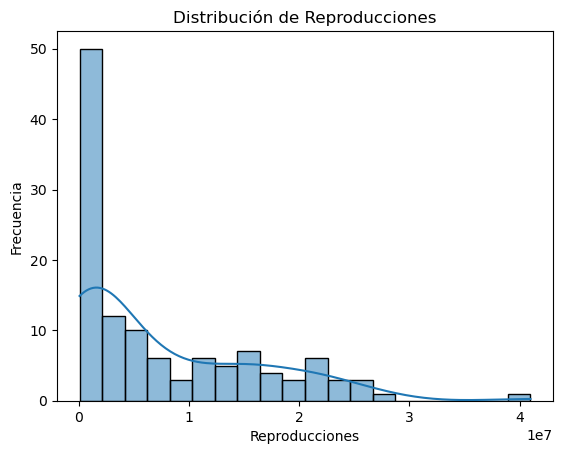

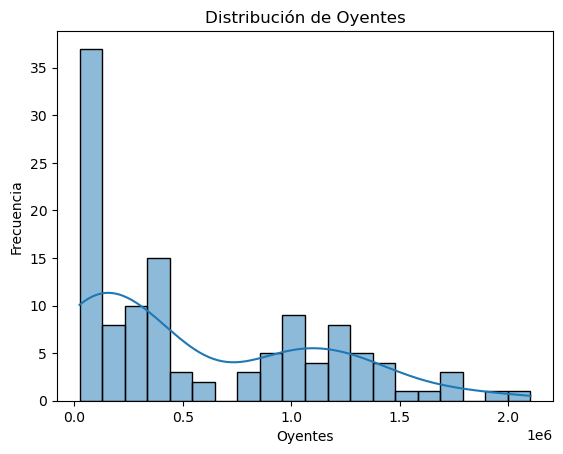

In [51]:
##Distribución por reproducciones
sns.histplot(df_top_canciones['playcount'], bins=20, kde=True)
plt.title('Distribución de Reproducciones')
plt.xlabel('Reproducciones')
plt.ylabel('Frecuencia')
plt.show()

##Distribución por oyentes
sns.histplot(df_top_canciones['listeners'], bins=20, kde=True)
plt.title('Distribución de Oyentes')
plt.xlabel('Oyentes')
plt.ylabel('Frecuencia')
plt.show()

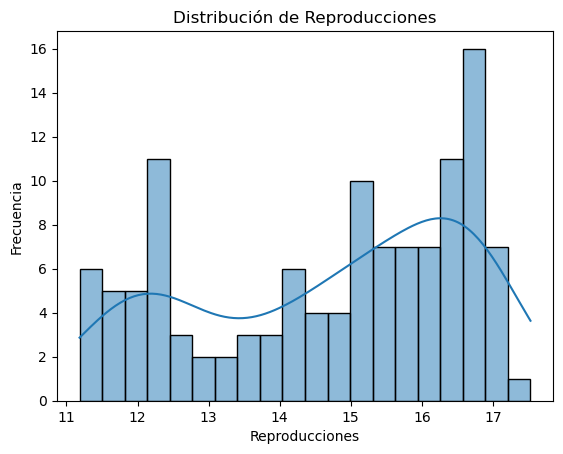

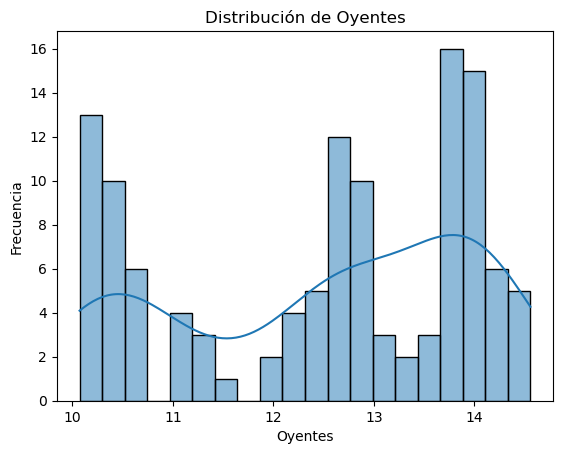

In [54]:
df_top_canciones['Reproducciones_Log'] = np.log1p(df_top_canciones['playcount'])
df_top_canciones['Oyentes_Log'] = np.log1p(df_top_canciones['listeners'])

##Distribución por reproducciones Log
sns.histplot(df_top_canciones['Reproducciones_Log'], bins=20, kde=True)
plt.title('Distribución de Reproducciones')
plt.xlabel('Reproducciones')
plt.ylabel('Frecuencia')
plt.show()

##Distribución por oyentes Log
sns.histplot(df_top_canciones['Oyentes_Log'], bins=20, kde=True)
plt.title('Distribución de Oyentes')
plt.xlabel('Oyentes')
plt.ylabel('Frecuencia')
plt.show()